In [1]:
from src.image_filter import ImageFilter
from src.visualizer import Visualizer
from src.camera import Camera
from src.lane_finder import LaneFinder

import numpy as np
import pickle
import glob
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
calibration_data = pickle.load(open("calibration_data.p", "rb" ))
calibration_data

{'camera_matrix': array([[1.15777818e+03, 0.00000000e+00, 6.67113856e+02],
        [0.00000000e+00, 1.15282217e+03, 3.86124584e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 'distortion_coefficient': array([[-0.24688507, -0.02373153, -0.00109831,  0.00035107, -0.00259872]])}

In [3]:
prespective_data = pickle.load(open("prespective_data.p", "rb" ))
prespective_data

{'car_points': [(585, 460), (203, 720), (1127, 720), (695, 460)],
 'bird_points': [(320, 0), (320, 720), (960, 720), (960, 0)]}

In [4]:
camera = Camera(calibration_data, prespective_data['car_points'], prespective_data['bird_points'])
visualizer = Visualizer()

In [5]:
filter_dict = {
    'color1_min_threshold':40,        'color1_max_threshold':205,
    'color2_min_threshold':120,        'color2_max_threshold':255,
    'magnitude_min_threshold':20,
    'absolute_min_threshold' : 40,
    'direction_min_threshold':0.7,    'direction_max_threshold':1.4,
    'kernal_size':3
}
image_filter = ImageFilter(threshold_dict=filter_dict)

In [6]:
lane_finder_dict = {
    'n_window':9,
    'margin':100,
    'minpix':50,
    'ym_per_pix':30 / 720,
    'xm_per_pix':3.7 / 700
}
lane_finder = LaneFinder(lane_finder_dict)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
image name : ../test_images\straight_lines1.jpg
[real world] left best-fit curve parameters: [-7.62766497e-05 -2.11911462e-03  1.71198805e+00]
[real world] right best-fit curve parameters: [2.56198052e-04 2.71240547e-04 5.04182865e+00]
[pixel] left best-fit curve parameters: [-2.50533290e-05  5.27314195e-02  2.98927335e+02]
[pixel] right best-fit curve parameters: [ 8.41491348e-05 -1.23144613e-01  9.98898630e+02]
[left] current radius of curvature: 6555.526007733676 m
[right] current radius of curvature: 1952.3296050979782 m
vehicle position: -0.005910137970399189
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
image name : ../test_images\straight_lines2.jpg
[real world] left best-fit curve parameters: [ 2.19840920e-04 -1.25459122e-02  1.76950162e+00]
[real world] right best-fit curve parameters: [8.85927471e-06 1.29

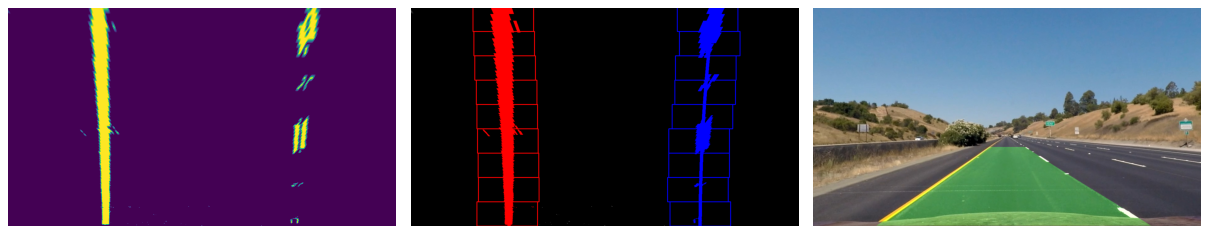

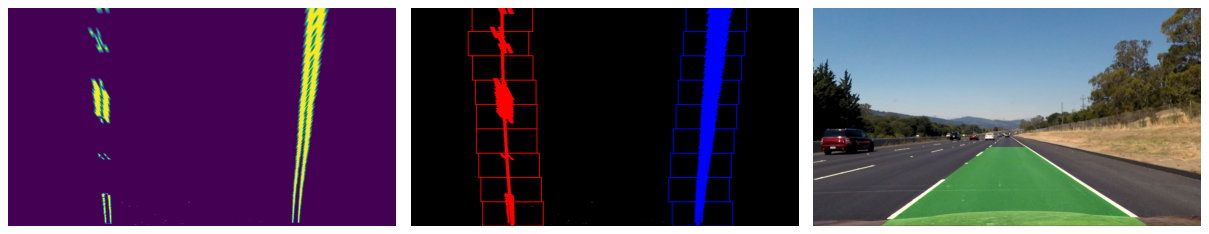

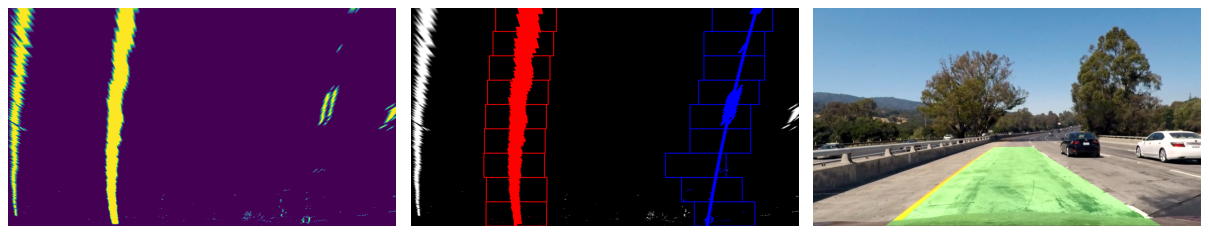

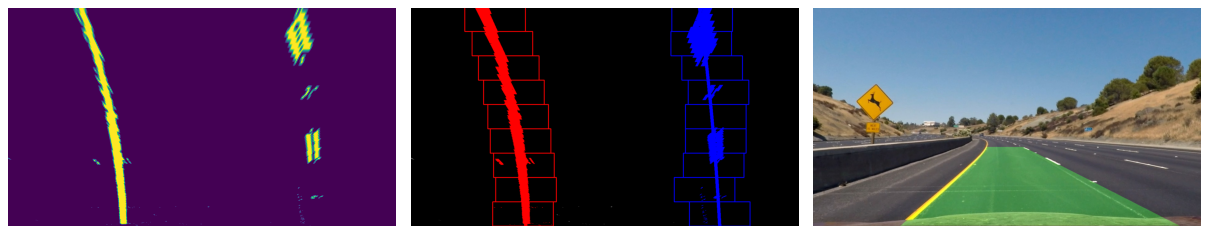

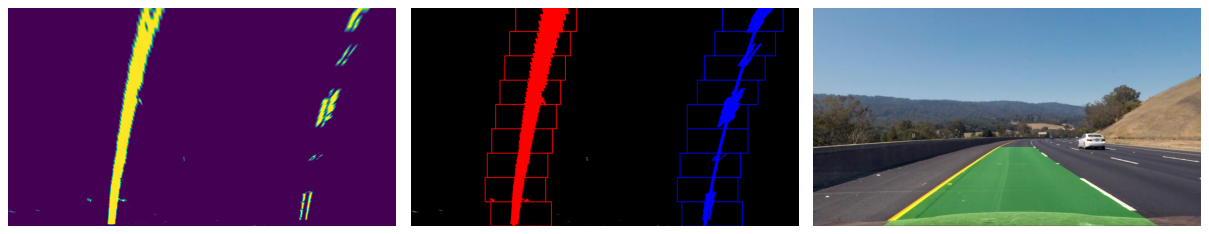

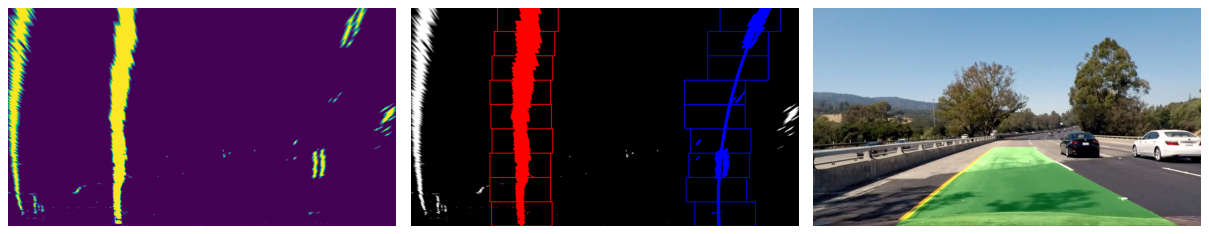

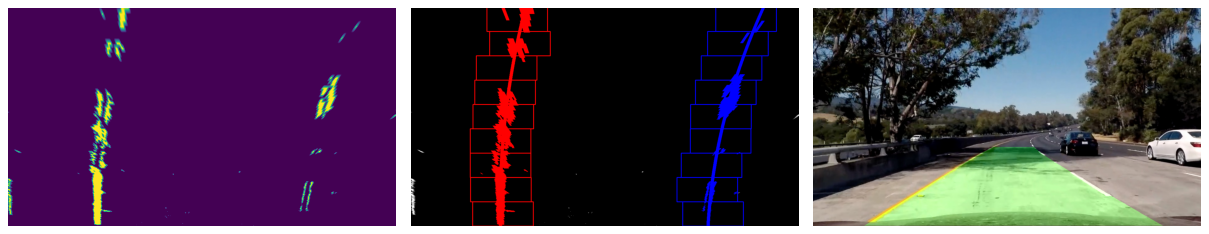

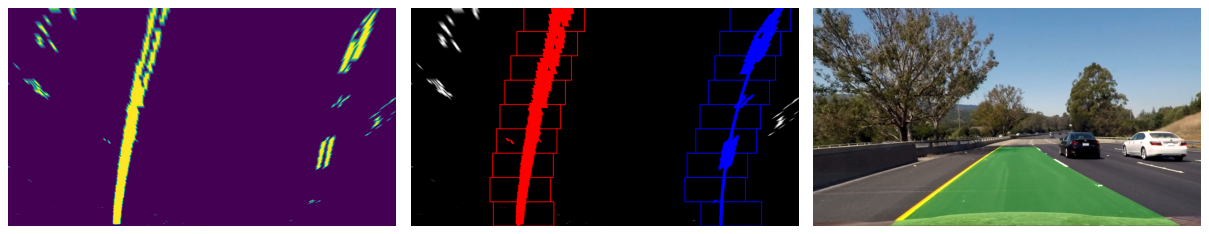

In [7]:
images_path = glob.glob('../test_images/*.jpg')
images_to_save = []
images_name_to_save = []
for image_path in images_path:
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    undist = camera.get_undistort_image(image)
    filtered_image, mask = image_filter.get_binary_image(undist)
    bird_view = camera.get_bird_view(filtered_image)
    
    result = lane_finder.process_image(bird_view)
    
    images_to_save.append(result['image'])
    images_name_to_save.append(os.path.basename(image_path))

    projected_image = camera.get_projected_image(undist, bird_view, result['ploty'], result['leftx'], result['rightx'])
    
    print("image name : {}".format(image_path))
    print("[real world] left best-fit curve parameters:", result['left_fit_meter'])
    print("[real world] right best-fit curve parameters:", result['right_fit_meter'])
    print("[pixel] left best-fit curve parameters:", result['left_fit_pixel'])
    print("[pixel] right best-fit curve parameters:", result['right_fit_pixel'])
    print("[left] current radius of curvature:", result['left_radius'], "m")
    print("[right] current radius of curvature:", result['right_radius'], "m")
    print("vehicle position:", result['vehicle_position'])
    visualizer.show_images([bird_view, result['image'], projected_image], per_row = 3, per_col = 1, W = 15, H = 5)
visualizer.save_images('lane_finder', images_to_save, images_name_to_save)

# [real world] left best-fit curve parameters: [ -1.62054436e-04   4.31245011e-03   1.71104116e+00]
# [real world] right best-fit curve parameters: [  1.45790386e-04  -3.29495738e-03   5.03763237e+00]
# [pixel] left best-fit curve parameters: [ -5.32273392e-05   3.39945391e-02   3.23710490e+02]
# [pixel] left best-fit curve parameters: [  4.78853559e-05  -2.59737632e-02   9.53065583e+02]
# [left] current radius of curvature: 3085.51848009 m
# [right] current radius of curvature: 3429.73435532 m
# vehicle position: 0.0 m left of center
